In [3]:
%%javascript 
var kernel = Jupyter.notebook.kernel; 
var command = ["notebookPath = ",
               "'", window.document.body.dataset.notebookPath, "'" ].join('')
//alert(command)
kernel.execute(command)
var command = ["notebookName = ",
               "'", window.document.body.dataset.notebookName, "'" ].join('')
//alert(command)
kernel.execute(command)

<IPython.core.display.Javascript object>

In [1]:
import os
import sys
import nibabel, argparse, matplotlib, sys
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
from skimage import measure
from skimage import data
from skimage.transform import rescale
from mpl_toolkits.mplot3d import Axes3D
from pylab import get_cmap
BASE_DIR = ""

ct_filename = (BASE_DIR +'3182212.nii').replace("\\", "/")
liver_mask_file = (BASE_DIR + '3182212_BL_Liver_NM.ids').replace("\\", "/")
tumor_mask_file = (BASE_DIR + '3182212_BL_t1_NM.ids').replace("\\", "/")



In [2]:
# Make sure the images are in the correct orientation.
ct = nibabel.load(ct_filename)

# Load the pre-contrast and arterial-phase images.
ct = nibabel.as_closest_canonical(ct)

# The spacing between pixels.
ct_dimx, ct_dimy, ct_dimz = ct.header['pixdim'][1:4]

# Units of spacing (e.g. millimeters or centimeters).
ct_units = ct.header['xyzt_units']

# Get the raw pixel data.
ct_data = np.asarray(ct.dataobj).astype(dtype='float64')

# Orient the images along the same axis as the binary masks.
ct_data = ct_data[::-1,:,:]



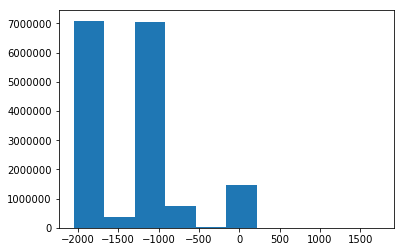

In [3]:
flat_ct= ct_data.flatten()
plt.hist(flat_ct)
plt.show()



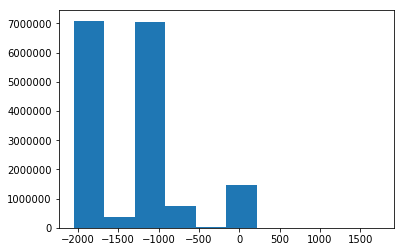

In [4]:

max_ct = np.amax(ct_data)
min_ct = np.amin(ct_data)
range_ct = max_ct-min_ct

ct_data = ct_data
flat_ct= ct_data.flatten()
plt.hist(flat_ct)
plt.show()


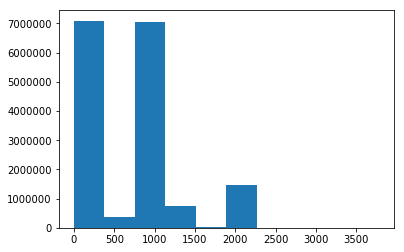

In [5]:
ct_data= (-1* min_ct) + ct_data
flat_ct= ct_data.flatten()
plt.hist(flat_ct)
plt.show()

In [6]:
ct_data= ct_data -1024



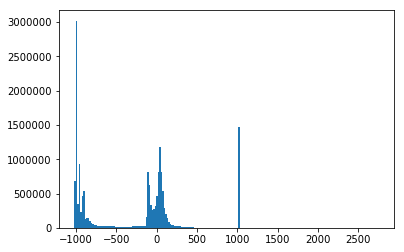

In [7]:
flat_ct= ct_data.flatten()
plt.hist(flat_ct, bins=200)
plt.show()

In [8]:
with open(liver_mask_file, 'rb') as f:
    liver = f.read()
    liver = np.fromstring(liver, dtype='uint8')
    liver = np.reshape(liver, (ct_data.shape[2], ct_data.shape[1], ct_data.shape[0]))
    liver = np.transpose(liver, (2,1,0))
    liver = liver[:,::-1,:]
    liver[liver > 0] = 1

with open(tumor_mask_file, 'rb') as f:
    tumor = f.read()
    tumor = np.fromstring(tumor, dtype='uint8')
    tumor = np.reshape(tumor, (ct_data.shape[2], ct_data.shape[1], ct_data.shape[0]))
    tumor = np.transpose(tumor, (2,1,0))
    tumor = tumor[:,::-1,:]
    tumor[tumor > 0] = 1

In [9]:
 x, y, z = ct_data.shape 
    
# Everything except the tumor.
diff_without_tumor = np.copy(ct_data)
diff_without_tumor[tumor > 0] = np.amin(ct_data)

# Just the tumor.
just_tumor = np.copy(ct_data)
just_tumor[tumor <= 0] = np.amin(ct_data)

# Just the liver.
just_liver = np.copy(ct_data)
just_liver[liver <= 0] = np.amin(ct_data)



In [11]:
# Calculate the liver volume.
liver_volume = np.sum(liver) * ct_dimx * ct_dimy * ct_dimz
is_in_mm = ct_units == 2 or liver_volume > 10000
if is_in_mm: # 2 is the code for millimeter, we convert to cubic centimeters.
    liver_volume /= 1000
    
# Calculate the tumor volume.
tumor_volume = np.sum(tumor) * ct_dimx * ct_dimy * ct_dimz
if is_in_mm: # 2 is the code for millimeter, we convert to cubic centimeters.
    tumor_volume /= 1000
    



In [24]:
sum(flat_tumor == -1024)

16615499

In [23]:
np.amin(flat_tumor)

-1024.0

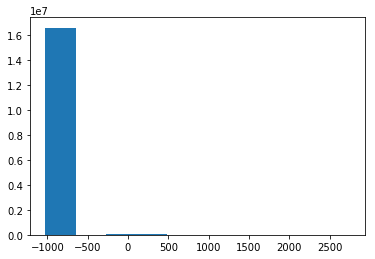

In [22]:
flat_tumor= just_tumor.flatten()
plt.hist(flat_tumor, range=[-1000,900], bins=200)
plt.show()

In [13]:
threshold = 67

In [18]:
sum(flat_tumor <= threshold)

16661430

In [ ]:
float(sum(flat_tumor > threshold)) / (flat_tumor.size - sum(flat_tumor == np.amin(flat_tumor)))

In [42]:
num_past_thres = sum(flat_tumor > threshold)

In [ ]:
115786/161717

In [25]:
16777216-16615499

161717

In [46]:
print num_past_thres
print flat_tumor.size

print float(num_past_thres)/flat_tumor.size

115786
16777216
0.00690138339996


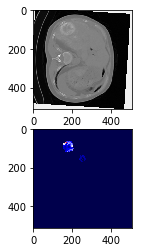

In [40]:

mask = (just_tumor > threshold)*1
masked_img = just_tumor * mask

slice_num = 29
plt.subplot(211)
plt.imshow(ct_data[:,:,slice_num],cmap=cm.gray)
plt.subplot(212)
plt.imshow(masked_img[:,:,slice_num], cmap=cm.seismic)
plt.show()


In [ ]:
# proportion of tumor that is lipiodol
from scipy import integrate 


# sum of all lipiodol elements
